In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

# ANALYSIS THE DATA 

In [3]:
#read the data set 
df =pd.read_csv(r'C:\Users\jains\Downloads\income_evaluation.csv')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#find null values in data
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
 Sex              0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#CHECK DATA TYPES 
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
 Sex              object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
#NO. OF ROWS AND COLUMNS
df.shape

(32561, 15)

In [8]:
#CHECK DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9    Sex            32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', ' Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# we will check the distribution of target variable ='income'

In [10]:
df.Income.value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [11]:
df_target=df.Income.value_counts()/len(df)*100

In [12]:
df_target

 <=50K    75.919044
 >50K     24.080956
Name: Income, dtype: float64

<BarContainer object of 2 artists>

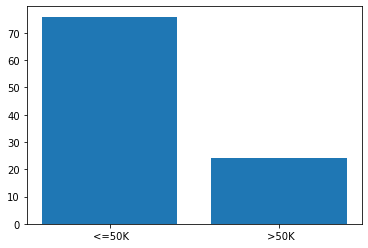

In [13]:
#check for data unbalance 
plt.bar(df_target.index,df_target)


# lets start encoding with target variable

In [14]:
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

In [17]:
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int32

# encoding features

In [18]:
features=df.columns[df.dtypes=='object']
print(features)

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', ' Sex', 'Native_country'],
      dtype='object')


In [21]:
#encoding features using getdomies
new_df=pd.get_dummies(df,features)
new_df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# split data into train and test 

In [23]:
x=new_df.drop('Income',axis=1)
x.shape

(32561, 108)

In [27]:
y=new_df[['Income']]
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [29]:
x_train.shape

(24420, 108)

In [30]:
x_test.shape

(8141, 108)

In [31]:
y_train.shape

(24420, 1)

In [32]:
y_test.shape

(8141, 1)

# asuming the normal distribution 

In [33]:
gnb_classifier=GaussianNB()
gnb_classifier.fit(x_train,y_train)

C:\Users\jains\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

# calculate the accuracy score of our model

In [34]:
y_predict=gnb_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print('accuracy',accuracy_score(y_test,y_predict))

accuracy 0.7949883306719077


In [36]:
print('precission',precision_score(y_test,y_predict))

precission 0.6680988184747583


In [37]:
print('recall',recall_score(y_test,y_predict))

recall 0.313824419778002


In [38]:
bnb_classifier=BernoulliNB()
bnb_classifier.fit(x_train,y_train)

C:\Users\jains\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BernoulliNB()

In [42]:
y_predict1=bnb_classifier.predict(x_test)
y_predict1

array([0, 0, 1, ..., 0, 1, 0])

In [43]:
print('accuracy',accuracy_score(y_test,y_predict1))

accuracy 0.7593661712320354


In [44]:
print('precission',precision_score(y_test,y_predict1))

precission 0.5037471489084392


In [45]:
print('recall',recall_score(y_test,y_predict1))

recall 0.7800201816347124
